# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from NLFFF.load_nlfff import nlfff
from pathlib import Path
from sunpy.map import Map

In [2]:
GD = Path('/Users/mgjeon/Library/CloudStorage/GoogleDrive-A/My Drive/Notes/Work/PINN/')
NAS = Path('/Volumes/drive/Research/SSWLAB/NF2')

# Prepare Data

## Colab npy

In [3]:
npy_path = NAS / 'NOAA12673/colab_info/12673_20170906_083600_colab.npy'

In [4]:
B = np.load(npy_path)

In [5]:
Bx = B[:, :, :, 0]
By = B[:, :, :, 1]
Bz = B[:, :, :, 2]

Bx_z0 = Bx[:, :, 0].transpose()
By_z0 = By[:, :, 0].transpose()
Bz_z0 = Bz[:, :, 0].transpose()

## Kusano nc

In [12]:
nc_path = NAS / 'Kusano_DB/NOAA12673/12673_20170906_083600.nc'

In [13]:
nlff = nlfff(nc_path)

x (westward)  unit: Mm
y (northward)  unit: Mm
z (out ot photosphere)  unit: Mm
Bx (westward)  unit: G
By (northward)  unit: G
Bz (out of photosphere)  unit: G
Bx_pot (westward)  unit: G
By_pot (northward)  unit: G
Bz_pot (out of photosphere)  unit: G


In [14]:
b = np.stack([nlff.bx, nlff.by, nlff.bz], axis=-1)

In [15]:
bx = b[:, :, :, 0]
by = b[:, :, :, 1]
bz = b[:, :, :, 2]

bx_z0 = bx[:, :, 0].transpose()
by_z0 = by[:, :, 0].transpose()
bz_z0 = bz[:, :, 0].transpose()

## Observation SHARP fits

In [10]:
hmi_p = GD / 'AR_7115_series/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits'
hmi_t = GD / 'AR_7115_series/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits'
hmi_r = GD / 'AR_7115_series/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits'

Bp = Map(hmi_p).data
Bt = Map(hmi_t).data
Br = Map(hmi_r).data

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


# Plot

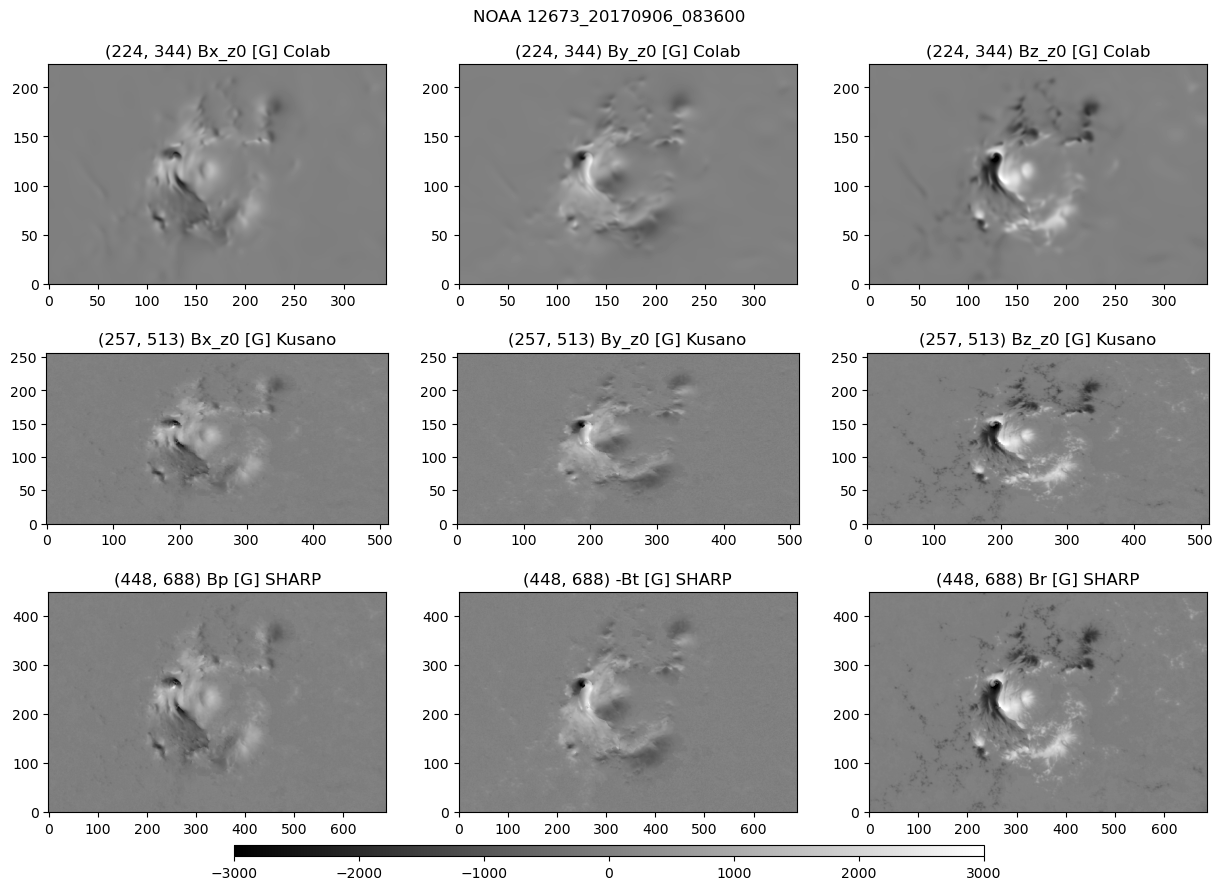

In [16]:
vmin = -3000
vmax = 3000

fig, axes = plt.subplots(3,3, figsize=(15, 11))

im = axes[0,0].imshow(Bx_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0,0].set_title(f'{np.shape(Bx_z0)} Bx_z0 [G] Colab')
axes[0,1].imshow(By_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0,1].set_title(f'{np.shape(By_z0)} By_z0 [G] Colab')
axes[0,2].imshow(Bz_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0,2].set_title(f'{np.shape(Bz_z0)} Bz_z0 [G] Colab')

axes[1,0].imshow(bx_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1,0].set_title(f'{np.shape(bx_z0)} Bx_z0 [G] Kusano')
axes[1,1].imshow(by_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1,1].set_title(f'{np.shape(by_z0)} By_z0 [G] Kusano')
axes[1,2].imshow(bz_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1,2].set_title(f'{np.shape(bz_z0)} Bz_z0 [G] Kusano')

axes[2,0].imshow(Bp, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[2,0].set_title(f'{np.shape(Bp)} Bp [G] SHARP')
axes[2,1].imshow(-Bt, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[2,1].set_title(f'{np.shape(Bt)} -Bt [G] SHARP')
axes[2,2].imshow(Br, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[2,2].set_title(f'{np.shape(Br)} Br [G] SHARP')

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.25, 0.16, 0.5, 0.01])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

fig.suptitle(t='NOAA 12673_20170906_083600', x=0.5, y=0.93)

figpath = NAS / 'NOAA12673/12673_20170906_083600_all.png'
fig.savefig(figpath, dpi=300)

# J = |curl(B)|

In [17]:
from nf2.train.metric import *

In [18]:
colab_J = vector_norm(curl(B))

In [19]:
colab_J_z0 = colab_J[:, :, 0].transpose()

In [20]:
Kusano_J = vector_norm(curl(b))

In [21]:
Kusano_J_z0 = Kusano_J[:, :, 0].transpose()

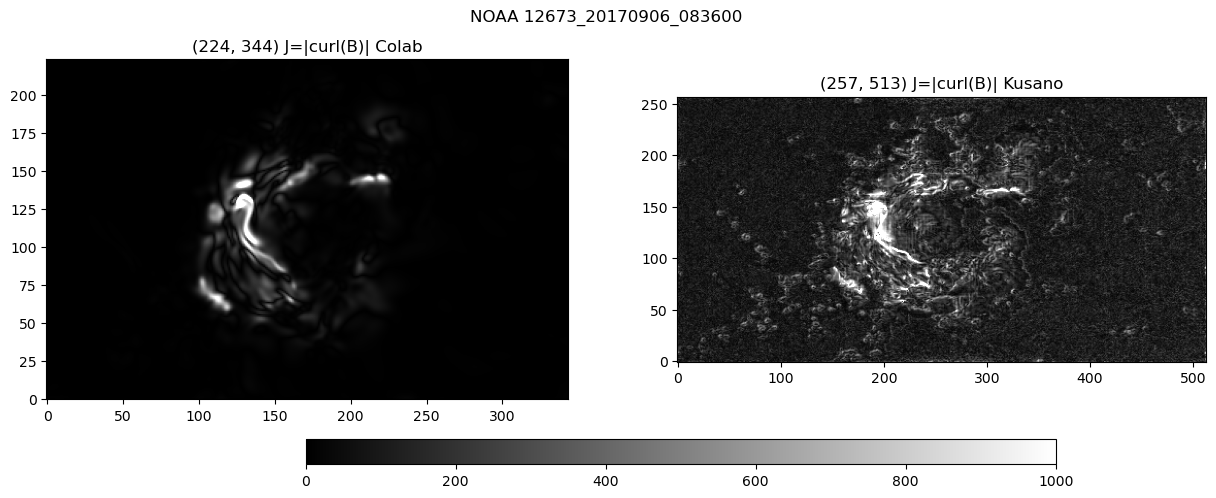

In [22]:
vmin = 0
vmax = 1000
fig, axes = plt.subplots(1,2, figsize=(15, 5))
im = axes[0].imshow(colab_J_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0].set_title(f'{np.shape(colab_J_z0)} J=|curl(B)| Colab')
axes[1].imshow(Kusano_J_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1].set_title(f'{np.shape(Kusano_J_z0)} J=|curl(B)| Kusano')

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.07, 0.5, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

fig.suptitle(t='NOAA 12673_20170906_083600', x=0.5, y=0.98)

figpath = NAS / 'NOAA12673/12673_20170906_083600_J.png'
fig.savefig(figpath, dpi=300)

# PLOT

In [23]:
colab_ny, colab_nx = np.shape(Bz_z0)
Kusano_ny, Kusano_nx = np.shape(bz_z0)
SHARP_ny, SHARP_nx = np.shape(Br)


max1 = max(max(Bz_z0[:, colab_nx//2]), max(bz_z0[:, Kusano_nx//2]), max(Br[:, SHARP_nx//2]))
min1 = min(min(Bz_z0[:, colab_nx//2]), min(bz_z0[:, Kusano_nx//2]), min(Br[:, SHARP_nx//2]))

max2 = max(max(Bz_z0[colab_ny//2, :]), max(bz_z0[Kusano_ny//2, :]), max(Br[SHARP_ny//2, :]))
min2 = min(min(Bz_z0[colab_ny//2, :]), min(bz_z0[Kusano_ny//2, :]), min(Br[SHARP_ny//2, :]))

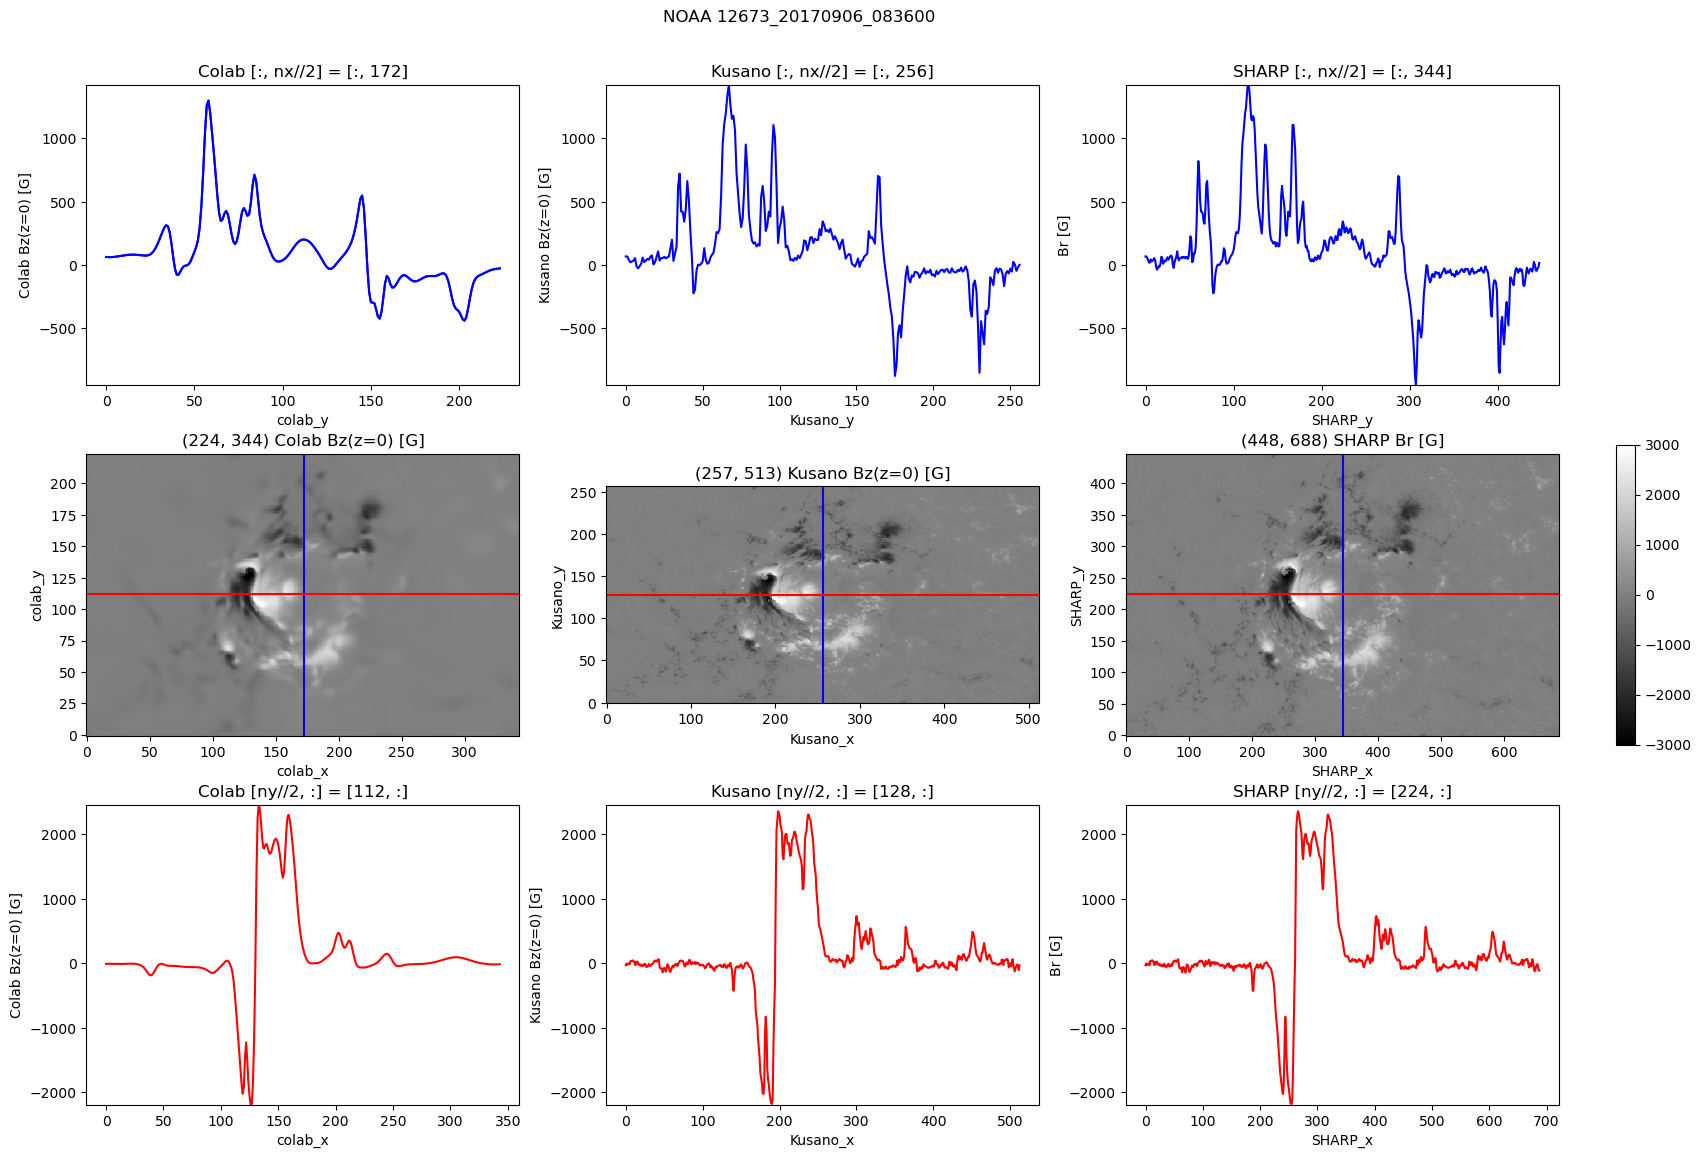

In [25]:
vmin = -3000
vmax = 3000

fig, axes = plt.subplots(3,3, figsize=(19, 15))

#---------------------------------------------
colab_x = np.arange(colab_nx)
colab_y = np.arange(colab_ny)

axes[0,0].plot(colab_y, Bz_z0[:, colab_nx//2], color='blue')
axes[0,0].plot(colab_y, Bz_z0[:, colab_nx//2], color='blue')
axes[0,0].set_title(f'Colab [:, nx//2] = [:, {colab_nx//2}]')
axes[0,0].set_ylim((min1, max1))
axes[0,0].set_ylabel('Colab Bz(z=0) [G]')
axes[0,0].set_xlabel('colab_y')

im = axes[1,0].pcolormesh(colab_x, colab_y, Bz_z0, vmin=vmin, vmax=vmax, cmap='gray', shading='auto')
axes[1,0].set_aspect('equal')
axes[1,0].set_title(f'{np.shape(Bz_z0)} Colab Bz(z=0) [G]')
axes[1,0].axvline(colab_x[colab_nx//2], color='blue')
axes[1,0].axhline(colab_y[colab_ny//2], color='red')
axes[1,0].set_xlabel('colab_x')
axes[1,0].set_ylabel('colab_y')

axes[2,0].plot(colab_x, Bz_z0[colab_ny//2, :], color='red')
axes[2,0].set_title(f'Colab [ny//2, :] = [{colab_ny//2}, :]')
axes[2,0].set_ylim((min2, max2))
axes[2,0].set_ylabel('Colab Bz(z=0) [G]')
axes[2,0].set_xlabel('colab_x')

#---------------------------------------------
Kusano_x = np.arange(Kusano_nx)
Kusano_y = np.arange(Kusano_ny)

axes[0,1].plot(Kusano_y, bz_z0[:, Kusano_nx//2], color='blue')
axes[0,1].set_title(f'Kusano [:, nx//2] = [:, {Kusano_nx//2}]')
axes[0,1].set_ylim((min1, max1))
axes[0,1].set_ylabel('Kusano Bz(z=0) [G]')
axes[0,1].set_xlabel('Kusano_y')

im = axes[1,1].pcolormesh(Kusano_x, Kusano_y, bz_z0, vmin=vmin, vmax=vmax, cmap='gray', shading='auto')
axes[1,1].set_aspect('equal')
axes[1,1].set_title(f'{np.shape(bz_z0)} Kusano Bz(z=0) [G]')
axes[1,1].axvline(Kusano_x[Kusano_nx//2], color='blue')
axes[1,1].axhline(Kusano_y[Kusano_ny//2], color='red')
axes[1,1].set_xlabel('Kusano_x')
axes[1,1].set_ylabel('Kusano_y')

axes[2,1].plot(Kusano_x, bz_z0[Kusano_ny//2, :], color='red')
axes[2,1].set_title(f'Kusano [ny//2, :] = [{Kusano_ny//2}, :]')
axes[2,1].set_ylim((min2, max2))
axes[2,1].set_ylabel('Kusano Bz(z=0) [G]')
axes[2,1].set_xlabel('Kusano_x')

#---------------------------------------------
SHARP_x = np.arange(SHARP_nx)
SHARP_y = np.arange(SHARP_ny)

axes[0,2].plot(SHARP_y, Br[:, SHARP_nx//2], color='blue')
axes[0,2].set_title(f'SHARP [:, nx//2] = [:, {SHARP_nx//2}]')
axes[0,2].set_ylim((min1, max1))
axes[0,2].set_ylabel('Br [G]')
axes[0,2].set_xlabel('SHARP_y')

im = axes[1,2].pcolormesh(SHARP_x, SHARP_y, Br, vmin=vmin, vmax=vmax, cmap='gray', shading='auto')
axes[1,2].set_aspect('equal')
axes[1,2].set_title(f'{np.shape(Br)} SHARP Br [G]')
axes[1,2].axvline(SHARP_x[SHARP_nx//2], color='blue')
axes[1,2].axhline(SHARP_y[SHARP_ny//2], color='red')
axes[1,2].set_xlabel('SHARP_x')
axes[1,2].set_ylabel('SHARP_y')

axes[2,2].plot(SHARP_x, Br[SHARP_ny//2, :], color='red')
axes[2,2].set_title(f'SHARP [ny//2, :] = [{SHARP_ny//2}, :]')
axes[2,2].set_ylim((min2, max2))
axes[2,2].set_ylabel('Br [G]')
axes[2,2].set_xlabel('SHARP_x')


fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.93, 0.44, 0.01, 0.2])
fig.colorbar(im, cax=cbar_ax, orientation='vertical')

fig.suptitle(t='NOAA 12673_20170906_083600', x=0.5, y=0.93)

figpath = NAS / 'NOAA12673/12673_20170906_083600_plot.png'
fig.savefig(figpath, dpi=300)